In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.shape

(53940, 11)

In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
# išmetu indeksų stulpelį - analizei jis nereikalingas
df=df.drop('Unnamed: 0', axis=1) 

In [5]:
df.shape

(53940, 10)

In [6]:
# tikrinu, ar yra null reikšmes
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [7]:
# pažiūriu, kiek unikalių reikšmių kiekviename stulpelyje, tiesiog žinojimui
x = []
for col in df.columns:
    x.append(len(df[col].unique()))
x = pd.Series(x)
x

0      273
1        5
2        7
3        8
4      184
5      127
6    11602
7      554
8      552
9      375
dtype: int64

In [8]:
# patikrinu, ar kuriuose stulpeliuose yra nulinių (0) reikšmių
df.eq(0.000).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x           True
y           True
z           True
dtype: bool

In [9]:
# patikrinu, kiek kieviename kuriuose stulpeliuose yra nulinių (0) reikšmių
result = pd.Series(index=df.columns, data=df['carat'].count() - np.count_nonzero(df, axis=0)) 
print(result)

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64


In [10]:
# nulinės reikšmės dimensijų stulpeliuose nėra logiškos. Kadangi tokių eilučių nedaug, jas pašalinu
df = df.loc[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [11]:
df.shape

(53920, 10)

In [12]:
# sukuriu naują sulpelį su kaina už vieną karatą
df['price_per_carat'] = df['price'] / df['carat']

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [14]:
df.dtypes

carat              float64
cut                 object
color               object
clarity             object
depth              float64
table              float64
price                int64
x                  float64
y                  float64
z                  float64
price_per_carat    float64
dtype: object

In [15]:
# susitvarkau su outliers - visus skaitinius kintamuosius apvalau nuo reikšmių už 3 std ribos ir stebiu, kiek kiekvieno 
# skaitinio stulpelio apvalymas keičia duomenų kiekį.

def remove_outliers (df):
    print("Initial shape: ", df.shape)
    for col in df.columns:
        if df[col].dtype in  ['float64', 'int64']:
            mean = df[col].mean()
            std = df[col].std()
            df = df.loc[(mean - 3*std <= df[col]) & (df[col] <= mean + 3 * std)]
            print("Shape after adjusting ", col, " : ", df.shape)
    return(df)

df = remove_outliers (df)

Initial shape:  (53920, 11)
Shape after adjusting  carat  :  (53484, 11)
Shape after adjusting  depth  :  (52821, 11)
Shape after adjusting  table  :  (52336, 11)
Shape after adjusting  price  :  (51184, 11)
Shape after adjusting  x  :  (51184, 11)
Shape after adjusting  y  :  (51182, 11)
Shape after adjusting  z  :  (51179, 11)
Shape after adjusting  price_per_carat  :  (50611, 11)


In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1400.000000


In [17]:
# STULPELIŲ STATISTINĖ ANALIZĖ
# jokių šokiruojančių išvadų, tik įdomu, kad karatų skirstinys turi keletą viršūnių. Matyt, svoris dažnai apvalinamas

In [18]:
def nice_distplot(col):
    sns.distplot(df[col])
    plt.axvline(df[col].median(), c='red')
    plt.axvline(df[col].mean(), c='green')    

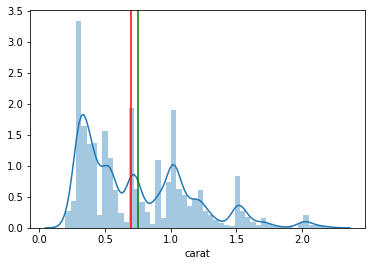

In [19]:
nice_distplot('carat')

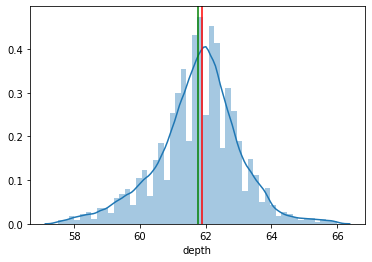

In [20]:
nice_distplot('depth')

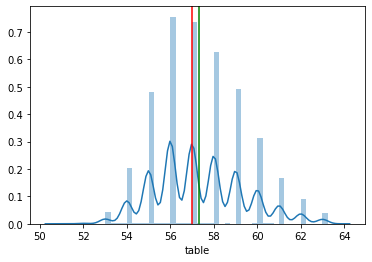

In [21]:
nice_distplot('table')

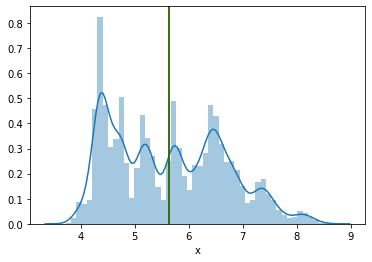

In [22]:
nice_distplot('x')

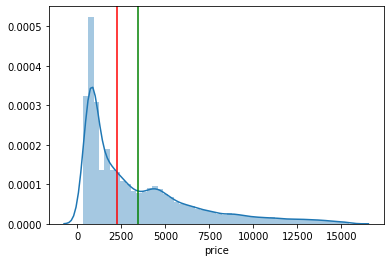

In [23]:
nice_distplot('price')

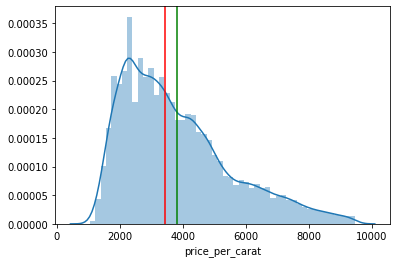

In [24]:
nice_distplot('price_per_carat')

In [25]:
# KORELIACIJOS

In [26]:
#from pandas.plotting import scatter_matrix
#attributes = ['depth', 'table', 'carat', 'x']
#scatter_matrix(df, figsize=(12, 8))

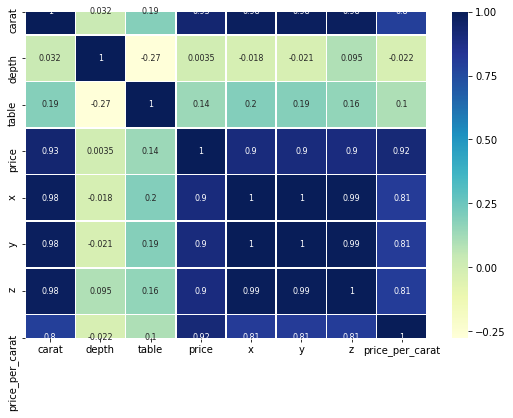

In [27]:
plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 8})
# per 10 min. nepavyko išspręsti, kad nenukirstų pirmos ir apatinės eilutės, tai palieku taip
plt.savefig('deimantu_corr.jpg')

In [28]:
corrs = df.corr().unstack().sort_values(ascending=False).drop_duplicates()
print(corrs.drop(corrs.index[0])) # numetu pirmą eilutę, nes ten visad bus kažkurio kintamojo koreliacija su savim

# didžiausios koreliacijos - tarp dydžio dimensijų. 
# Išvada - dauguma deimantų yra labiau rutuliški ar kubiški, negu pailgi. 
# Taip pat didelė korelaicija tarp svorio ir dydžio - kaip ir logiška, nes deimantų tankis yra daugmaž vienodas.
# Kaina labai stipriai koreliuoja su svoriu (93%). 
# Mažiausiai su visais kitais kintamaisiais (ir su kaina) koreliuoja depth ir table kintamieji.

y                x                  0.998623
z                x                  0.992574
                 y                  0.992263
carat            x                  0.982222
y                carat              0.981307
z                carat              0.981265
carat            price              0.934680
price_per_carat  price              0.919975
price            y                  0.902835
x                price              0.901914
z                price              0.898745
y                price_per_carat    0.813991
x                price_per_carat    0.811844
z                price_per_carat    0.806797
carat            price_per_carat    0.799484
table            x                  0.195947
y                table              0.191160
table            carat              0.189653
z                table              0.162559
table            price              0.142534
                 price_per_carat    0.100273
depth            z                  0.094913
carat     

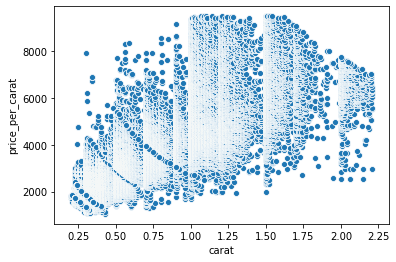

In [29]:
# Įdomu, kad karato kaina stipriai koreliuoja su kaina, bet silpniau koreliuoja su karatų skaičiumi.
# Grafikuose tai aiškiai matosi.
# išvadą formuluočiau taip - daugiau karatų nereiškia didesnės karato kainos, bet didesnė diemanto kaina reiškia, 
# kad ir karato kaina, tikėtina, bus didesnė.

sns.scatterplot(y="price_per_carat", x="carat", data=df)

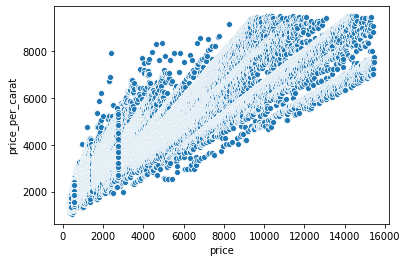

In [30]:
sns.scatterplot(y="price_per_carat", x="price", data=df)

In [31]:
# Diskrečių kintamųjų analizė

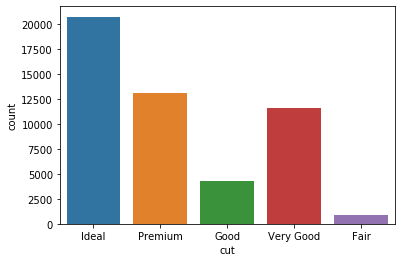

In [32]:
sns.countplot(df['cut'])

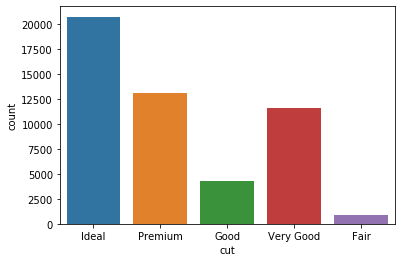

In [33]:
sns.countplot(df['cut'])

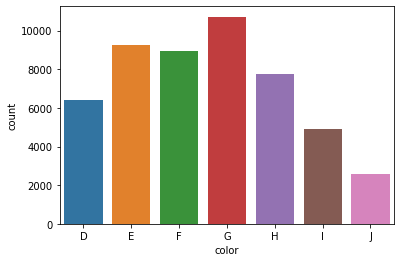

In [34]:
color_rank=['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.countplot(df['color'], order=color_rank)

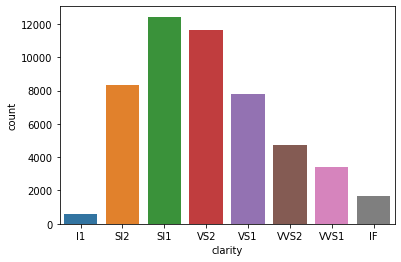

In [35]:
clar_rank=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.countplot(df['clarity'], order=clar_rank)

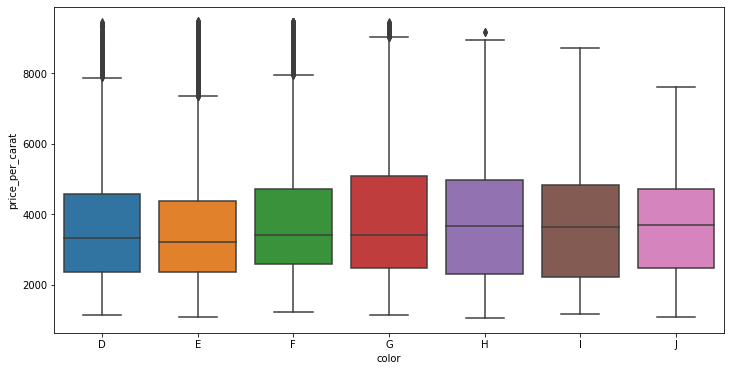

In [36]:
# surikiuoju spalvas pagal "gerumą": D yra labiausiai vertinama, J - mažiausiai
# visgi panašu, kad spalva neturi įtakos kainai

color_rank=['D', 'E', 'F', 'G', 'H', 'I', 'J']
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='price_per_carat', data=df, order=color_rank)

In [37]:
print(df.groupby('color').mean()['price'])

color
D    2752.476954
E    2685.070172
F    3257.578700
G    3561.342103
H    3959.126610
I    4300.358273
J    4729.008942
Name: price, dtype: float64


In [38]:
# J spalvos kaina didžiausia, bet dėl to, kad tos spalvos deimantai vidutiniškai didesni

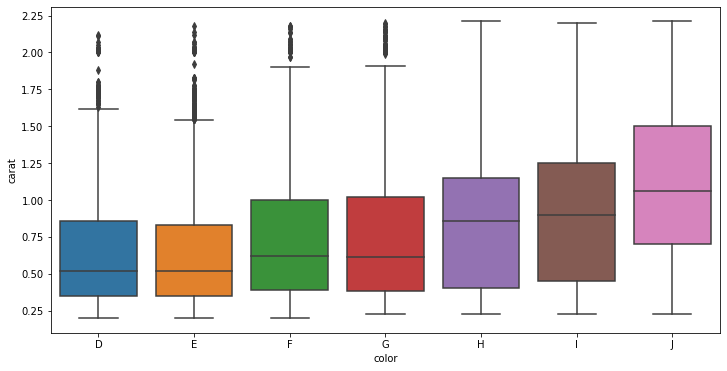

In [39]:
color_rank=['D', 'E', 'F', 'G', 'H', 'I', 'J']
plt.figure(figsize=(12, 6))
sns.boxplot(x='color', y='carat', data=df, order=color_rank)

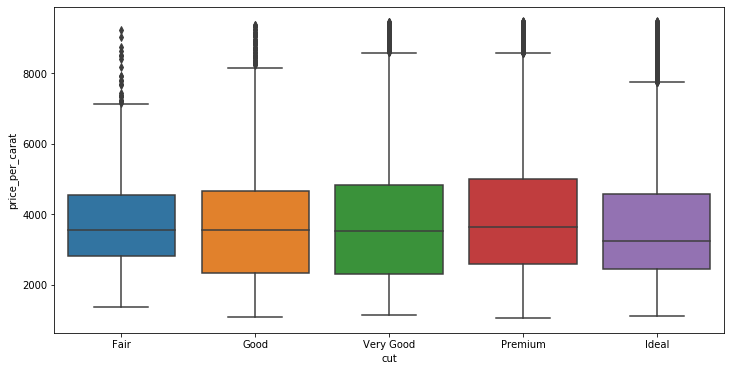

In [40]:
# cut tipas irgi neturi įtakos kainai

cut_rank=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price_per_carat', data=df, order=cut_rank)

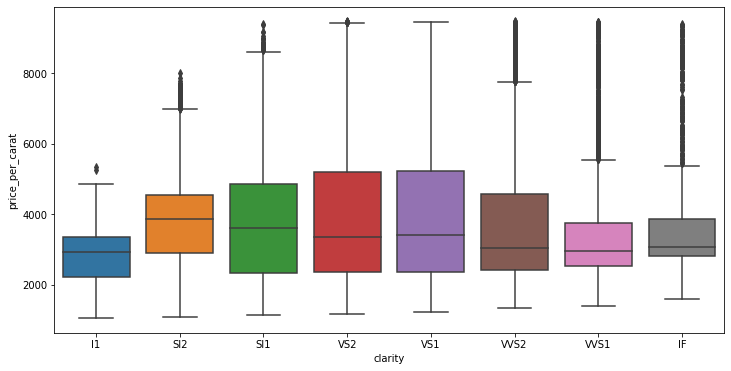

In [72]:
# clarity dimensija irgi neturi įtakos kainai...

clar_rank=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price_per_carat', data=df, order=clar_rank)

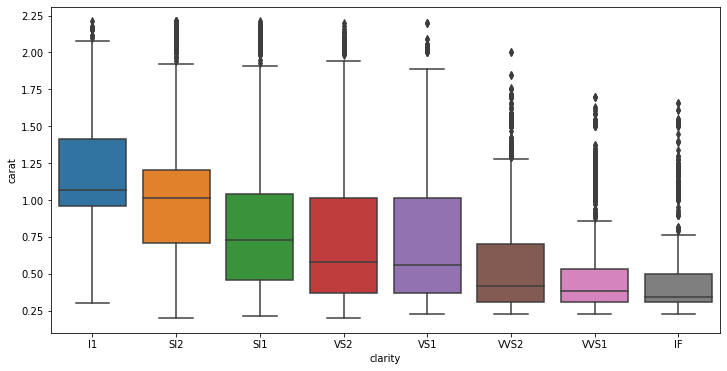

In [42]:
# ...nes prastensės kokybės deimantai dažniausiai didesnio dydžio
clar_rank=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='carat', data=df, order=clar_rank)

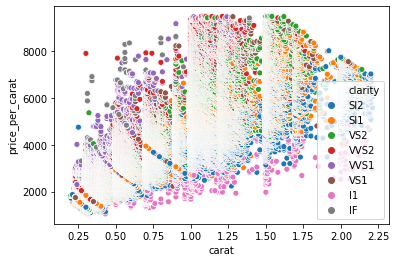

In [43]:
# ne per daug aiškumo, nors matoma pilkų (IF, aukščiausia kokybė) taškelių sankaupa viršutiniame kairiame kampe
sns.scatterplot(y="price_per_carat", x="carat", data=df, hue='clarity')

In [44]:
## MACHINE LEARNING

In [58]:
# dydžio dimensijos labai koreliuoja viena su kita ir su karatais, aš išmetu x, y ir z dimensijas
df_ml = df.drop(['x', 'y', 'z'], axis=1)

In [59]:
# konvertuoju cut, color ir clarity į dummy variables
df_ml = pd.get_dummies(df_ml, columns=['cut', 'color', 'clarity'])
df_ml.head()


,carat,depth,table,price,price_per_carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,1417.391304,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,1552.380952,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,1151.724138,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,1080.645161,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,1400.000000,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x = df_ml.drop(['price'], axis=1)
y = df_ml['price']

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

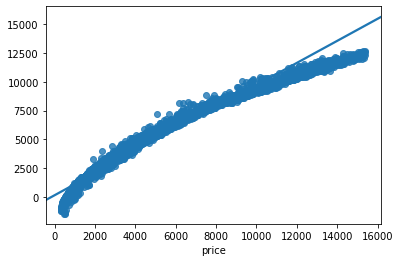

In [49]:
sns.regplot(y_test, y_pred)

In [50]:
from sklearn.metrics import mean_absolute_error # testavimas
print("Mean abs error: ", mean_absolute_error(y_test, y_pred))
print("Mean abs error as % of std", mean_absolute_error(y_test, y_pred)/df_ml['price'].std()*100)

Mean abs error:  521.4103230132072
Mean abs error as % of std 16.124393206422997


In [51]:
# Log


In [52]:
df_ml['price_log'] = np.log(df['price'])

model = LinearRegression()

x = df_ml.drop(['price', 'price_log'], axis=1)
y = df_ml['price_log']

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

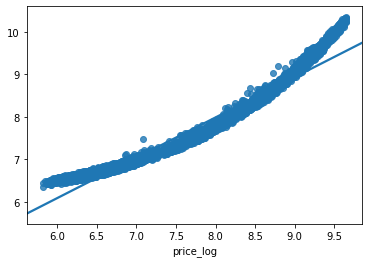

In [54]:
sns.regplot(y_test, y_pred)

In [55]:
print("Mean abs error: ", mean_absolute_error(y_test, y_pred))
print("Mean abs error as % of std", mean_absolute_error(y_test, y_pred)/df_ml['price_log'].std()*100)

Mean abs error:  0.17743928188015967
Mean abs error as % of std 18.423489719722415


In [ ]:
# ELASTIC NET 

In [63]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

x = df_ml.drop(['price'], axis=1)
y = df_ml['price']

x_train, x_test, y_train, y_test = train_test_split(x, y)

model.fit(x_train,  y_train) # Mokome ant x_train y_train!
y_pred = model.predict(x_test)

print("Mean abs error: ", mean_absolute_error(y_test, y_pred))
print("Mean abs error as % of std", mean_absolute_error(y_test, y_pred)/df_ml['price'].std()*100)


Mean abs error:  751.3556329713911
Mean abs error as % of std 23.23535444000919


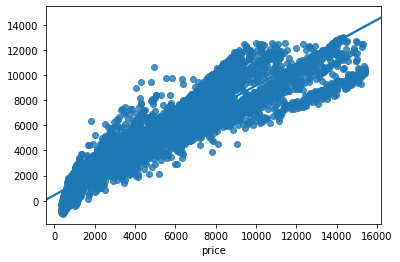

In [65]:
sns.regplot(y_test, y_pred)

In [ ]:
# RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
x = df_ml.drop(['price'], axis=1)
y = df_ml['price']
x_train, x_test, y_train, y_test = train_test_split(x, y)
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)

print("Mean abs error: ", mean_absolute_error(y_test, y_pred))
print("Mean abs error as % of std", mean_absolute_error(y_test, y_pred)/df_ml['price'].std()*100)

Mean abs error:  9.234354224294634
Mean abs error as % of std 0.2855684898209205


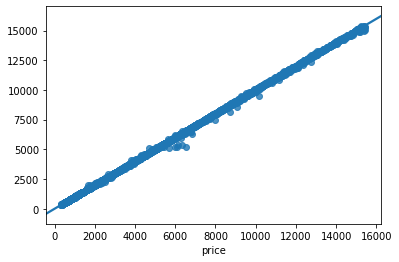

In [71]:
sns.regplot(y_test, y_pred)